<a href="https://colab.research.google.com/github/Ekaterina-31/Kursovaya-Chemical-Compounds/blob/main/7_ML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_SI_%3E_%D0%BC%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация: превышает ли значение SI медианное значение выборки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка датасета

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx')
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0,0.15,0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0,0.15,0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0,0.15,0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0,0.20,0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0,0.00,0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0,0.00,0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0,0.00,0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0,0.00,0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0,0.00,0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


## Подготовка данных для обучения модели

In [ ]:
SI_median = df['SI'].median()
SI_median

3.846153846153846

In [ ]:
y = (df['SI'] > SI_median).astype(int)
y

,SI
0,1
1,1
2,0
3,1
4,0
...,...
996,0
997,0
998,0
999,0


In [ ]:
# исключаем прочие целевые переменные
X = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'IC50, mM_log', 'CC50, mM_log', 'SI_log'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (800, 129), (800,)
Test dataset size: (201, 129), (201,)


## Выбор лучшей модели без гиперпараметров

In [ ]:
!pip install catboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# Список моделей
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(),
    # "SVM": SVC(),
}

In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")

scores = []
predictions = {}

for model_name, model in models.items():
    res = {}

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    res["model"] = model_name
    res["roc_auc"] = roc_auc_score(y_test, y_pred)
    res["accuracy"] = accuracy_score(y_test, y_pred)
    res["recall"] = recall_score(y_test, y_pred, average="weighted")
    res["precision"] = precision_score(y_test, y_pred, average="weighted")
    res["f1"] = f1_score(y_test, y_pred, average="weighted")

    scores.append(res)

scores = pd.DataFrame(scores)

Learning rate set to 0.009366
0:	learn: 0.6915050	total: 127ms	remaining: 2m 7s
1:	learn: 0.6901212	total: 205ms	remaining: 1m 42s
2:	learn: 0.6887758	total: 277ms	remaining: 1m 32s
3:	learn: 0.6870968	total: 338ms	remaining: 1m 24s
4:	learn: 0.6855479	total: 386ms	remaining: 1m 16s
5:	learn: 0.6839548	total: 475ms	remaining: 1m 18s
6:	learn: 0.6822334	total: 571ms	remaining: 1m 21s
7:	learn: 0.6808164	total: 649ms	remaining: 1m 20s
8:	learn: 0.6791467	total: 714ms	remaining: 1m 18s
9:	learn: 0.6774347	total: 775ms	remaining: 1m 16s
10:	learn: 0.6754933	total: 864ms	remaining: 1m 17s
11:	learn: 0.6738156	total: 942ms	remaining: 1m 17s
12:	learn: 0.6726218	total: 1.04s	remaining: 1m 18s
13:	learn: 0.6712685	total: 1.13s	remaining: 1m 19s
14:	learn: 0.6695549	total: 1.21s	remaining: 1m 19s
15:	learn: 0.6680737	total: 1.33s	remaining: 1m 22s
16:	learn: 0.6661846	total: 1.43s	remaining: 1m 22s
17:	learn: 0.6647775	total: 1.52s	remaining: 1m 23s
18:	learn: 0.6630501	total: 1.63s	remaining: 

In [ ]:
scores

,model,roc_auc,accuracy,recall,precision,f1
0,Decision Tree,0.557277,0.557214,0.557214,0.557331,0.557148
1,Random Forest,0.646386,0.646766,0.646766,0.649847,0.644654
2,KNN,0.636832,0.636816,0.636816,0.636847,0.636816
3,CatBoost,0.646436,0.646766,0.646766,0.649036,0.645167


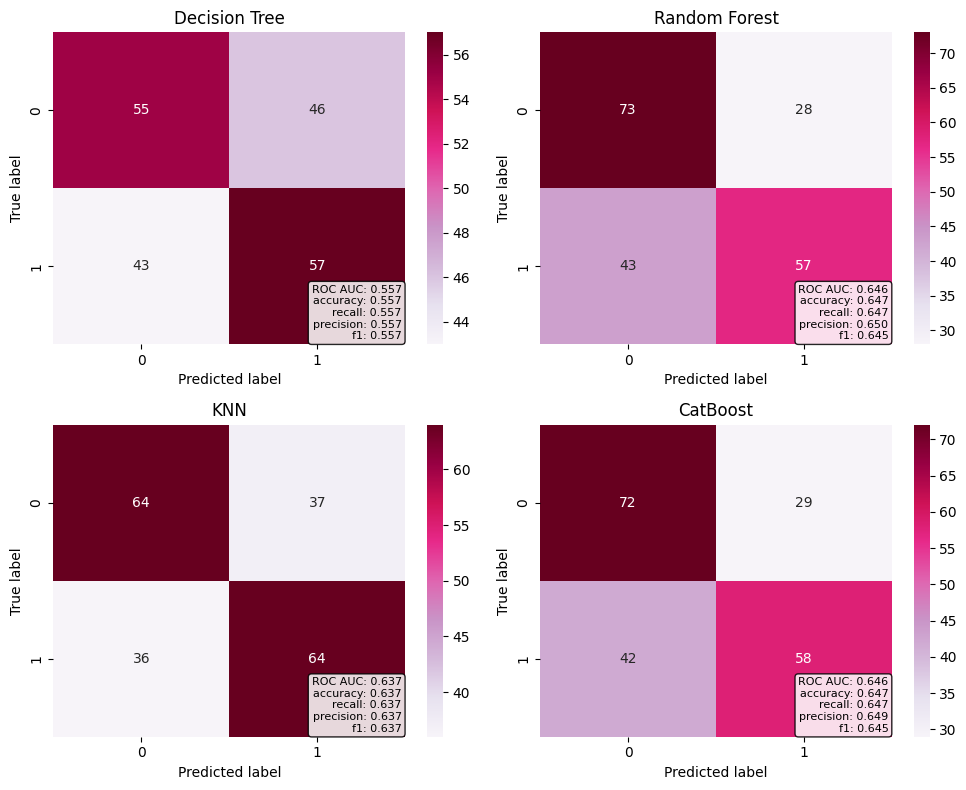

In [ ]:
import math
from sklearn.metrics import confusion_matrix

n_models = len(models)
n_cols = 2
n_rows = math.ceil(n_models / n_cols)  # автоматически вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=100)
axes = axes.flatten()

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='PuRd',
        ax=ax,
        xticklabels=['0', '1'],
        yticklabels=['0', '1']
    )
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    # Текст метрик
    metrics_text = (f"ROC AUC: {roc_auc:.3f}\n"
                    f"accuracy: {accuracy:.3f}\n"
                    f"recall: {recall_weighted:.3f}\n"
                    f"precision: {precision_weighted:.3f}\n"
                    f"f1: {f1_weighted:.3f}")

    ax.text(
        0.99, 0.01, metrics_text,
        transform=ax.transAxes,
        va='bottom', ha='right',
        fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white',
                  edgecolor='black',
                  alpha=0.85)
    )

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

## Выбор лучшей модели с гиперпараметрами

In [ ]:
!pip install scikit-optimize

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from skopt import BayesSearchCV

# Список моделей и их гиперпараметров
models = {
    "DecisionTree": (DecisionTreeClassifier(), {
        'max_depth': (10, 20),
        'min_samples_split': (10, 25),
    }),
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': (250, 350),
        'max_depth': (5, 15),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 8),
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': (1, 20),
        'weights': ['uniform', 'distance'],
    }),
    "CatBoost": (CatBoostClassifier(), {
        'n_estimators': (50, 100),
        'depth': (1, 10),
    }),
}

In [ ]:
%%time
# Перебор моделей
best_model = None
best_score = -float("inf")
best_params = {}

results = []

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

for name, (model, params) in models.items():

    # Байесовская оптимизация гиперпараметров
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=params,
        n_iter=15,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    # Обучение модели
    bayes_search.fit(X_train, y_train)

    y_pred = bayes_search.predict(X_test)

    scores = evaluate_model(y_test, y_pred)

    # Проверка, стала ли эта модель лучшей
    if bayes_search.best_score_ > best_score:
        best_score = bayes_search.best_score_
        best_model = name
        best_params = bayes_search.best_params_

    results.append({
    'Модель': name,
    'ROC AUC': bayes_search.best_score_,
    'accuracy': scores['accuracy'],
    'recall': scores['recall'],
    'precision': scores['precision'],
    'f1': scores['f1'],
    'Гиперпараметры': bayes_search.best_params_,
    })

Learning rate set to 0.146082
0:	learn: 0.6696723	total: 35.6ms	remaining: 1.74s
1:	learn: 0.6458671	total: 66.3ms	remaining: 1.59s
2:	learn: 0.6328999	total: 91.8ms	remaining: 1.44s
3:	learn: 0.6221499	total: 110ms	remaining: 1.26s
4:	learn: 0.6089732	total: 121ms	remaining: 1.09s
5:	learn: 0.5935812	total: 132ms	remaining: 972ms
6:	learn: 0.5828454	total: 144ms	remaining: 885ms
7:	learn: 0.5771380	total: 156ms	remaining: 818ms
8:	learn: 0.5673602	total: 168ms	remaining: 763ms
9:	learn: 0.5554428	total: 179ms	remaining: 716ms
10:	learn: 0.5483729	total: 191ms	remaining: 676ms
11:	learn: 0.5420784	total: 206ms	remaining: 651ms
12:	learn: 0.5334745	total: 219ms	remaining: 624ms
13:	learn: 0.5251133	total: 232ms	remaining: 597ms
14:	learn: 0.5186523	total: 244ms	remaining: 570ms
15:	learn: 0.5110892	total: 257ms	remaining: 546ms
16:	learn: 0.5038715	total: 268ms	remaining: 521ms
17:	learn: 0.4963861	total: 280ms	remaining: 498ms
18:	learn: 0.4903971	total: 292ms	remaining: 476ms
19:	lear

In [ ]:
pd.DataFrame(results)

,Модель,ROC AUC,accuracy,recall,precision,f1,Гиперпараметры
0,DecisionTree,0.684375,0.611940,0.611940,0.612500,0.611247,"{'max_depth': 14, 'min_samples_split': 23}"
1,RandomForest,0.740078,0.666667,0.666667,0.671295,0.664122,"{'max_depth': 13, 'min_samples_leaf': 4, 'min_..."
2,KNN,0.714906,0.641791,0.641791,0.641791,0.641791,"{'n_neighbors': 10, 'weights': 'distance'}"
3,CatBoost,0.735828,0.666667,0.666667,0.669288,0.665158,"{'depth': 6, 'n_estimators': 50}"


In [ ]:
# Вывод лучшей модели
print("Лучшая модель:", best_model)
print("Лучшие параметры:", best_params)
print("Лучший ROC AUC:", best_score)

Лучшая модель: RandomForest
Лучшие параметры: OrderedDict([('max_depth', 13), ('min_samples_leaf', 4), ('min_samples_split', 6), ('n_estimators', 322)])
Лучший ROC AUC: 0.740078125


## Подбор гиперпараметров для выбранной модели

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определяем модель
rf_model = RandomForestClassifier(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [250, 300, 350],  # Количество деревьев
    'max_depth': [5, 10, 15],  # Максимальная глубина деревьев
    'min_samples_split': [4, 6, 8],  # Минимальное количество сэмплов для разбиения узла
    'min_samples_leaf': [2, 4, 6],  # Минимальное количество сэмплов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='roc_auc', verbose=2)

# Обучение на данных
grid_search.fit(X_train, y_train)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Fitting 2 folds for each of 81 candidates, totalling 162 fits
CPU times: user 2.87 s, sys: 289 ms, total: 3.16 s
Wall time: 2min 8s


In [ ]:
# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

print(f"Best score (ROC AUC): {best_score:.4f}")

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 350}
Best score (ROC AUC): 0.7295


## Предсказание на всех данных

In [ ]:
# сделаем предсказания на тесте
y_pred = best_model.predict(X)

# y - это правильные ответы для X
print(f'ROC AUC: {roc_auc_score(y, y_pred)}')

ROC AUC: 0.8541297405189621
